In [2]:
# import the Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# Load the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
sub_data = dataset.iloc[ : , 3:5].values

In [6]:
sub_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
# Feature Scaling
from sklearn.preprocessing import normalize

In [8]:
sub_data_scaled = normalize(sub_data)

In [9]:
pd.DataFrame(sub_data_scaled).head()

0         1
0  0.358979  0.933346
1  0.182089  0.983282
2  0.936329  0.351123
3  0.203446  0.979086
4  0.391141  0.920331

### Visualize Denodagram

In [10]:
import scipy.cluster.hierarchy as sch

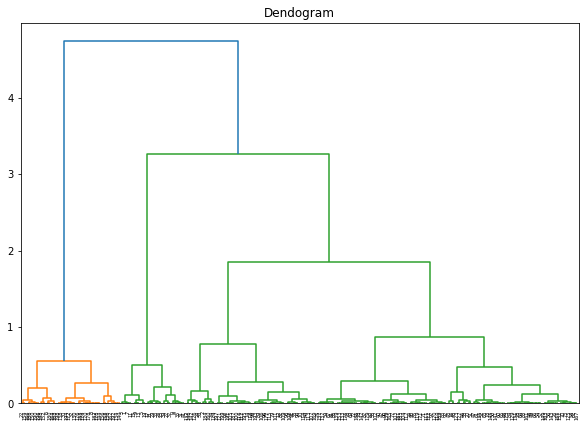

In [11]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
sch.dendrogram(sch.linkage(sub_data_scaled, method='ward'))
plt.show()

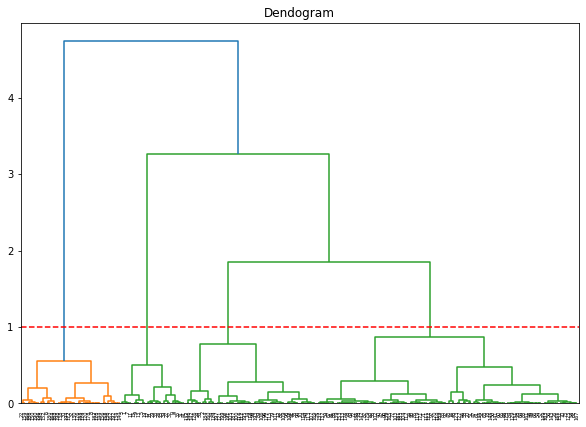

In [12]:
# By looking at Dendogram, we can conclude that 4 is an optimal 
plt.figure(figsize=(10,7))
plt.title('Dendogram')
sch.dendrogram(sch.linkage(sub_data_scaled, method='ward'))
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.show()

# Build Agglomerative Hierarical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [16]:
cluster_pred = cluster.fit_predict(sub_data_scaled)

In [17]:
cluster_pred

array([2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 1, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0,
       3, 1, 3, 0, 3, 0, 3, 0, 1, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

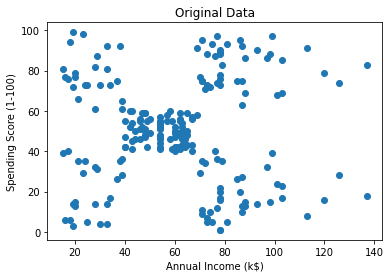

In [18]:
plt.scatter(x = dataset['Annual Income (k$)'], y = dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data')
plt.show()

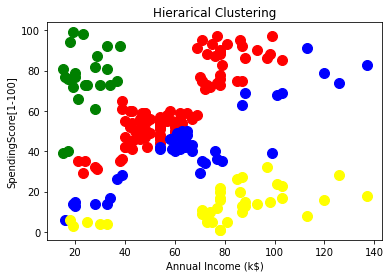

In [19]:
plt.scatter(sub_data[cluster_pred == 0, 0], sub_data[cluster_pred == 0, 1], s = 100, c = 'red', label='cluster 1')
plt.scatter(sub_data[cluster_pred == 1, 0], sub_data[cluster_pred == 1, 1], s = 100, c = 'blue', label='cluster 2')
plt.scatter(sub_data[cluster_pred == 2, 0], sub_data[cluster_pred == 2, 1], s = 100, c = 'green', label='cluster 3')
plt.scatter(sub_data[cluster_pred == 3, 0], sub_data[cluster_pred == 3, 1], s = 100, c = 'yellow', label='cluster 4')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore[1-100]')
plt.title('Hierarical Clustering')
plt.show()

In [20]:
dataset['Clusters'] = cluster_pred

In [21]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Clusters  
0         2  
1         2  
2         1  
3         2  
4         2

In [22]:
#Filter
dataset[dataset['Clusters'] == 3]

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
6             7  Female   35                  18                       6   
8             9    Male   64                  19                       3   
22           23  Female   46                  25                       5   
30           31    Male   60                  30                       4   
32           33    Male   53                  33                       4   
128         129    Male   59                  71                      11   
130         131    Male   47                  71                       9   
134         135    Male   20                  73                       5   
136         137  Female   44                  73                       7   
138         139    Male   19                  74                      10   
140         141  Female   57                  75                       5   
144         145    Male   25                  77                      12   
148         149  Female   34                  78                      22   
150         151    Male   43                  78                      17   
152         153  Female   44                  78                      20   
154         155  Female   47                  78                      16   
156         157    Male   37                  78                       1   
158         159    Male   34                  78                       1   
162         163    Male   19                  81                       5   
164         165    Male   50                  85                      26   
166         167    Male   42                  86                      20   
168         169  Female   36                  87                      27   
170         171    Male   40                  87                      13   
172         173    Male   36                  87                      10   
174         175  Female   52                  88                      13   
176         177    Male   58                  88                      15   
178         179    Male   59                  93                      14   
180         181  Female   37                  97                      32   
182         183    Male   46                  98                      15   
186         187  Female   54                 101                      24   
188         189  Female   41                 103                      17   
190         191  Female   34                 103                      23   
192         193    Male   33                 113                       8   
194         195  Female   47                 120                      16   
196         197  Female   45                 126                      28   
198         199    Male   32                 137                      18   

     Clusters  
6           3  
8           3  
22          3  
30          3  
32          3  
128         3  
130         3  
134         3  
136         3  
138         3  
140         3  
144         3  
148         3  
150         3  
152         3  
154         3  
156         3  
158         3  
162         3  
164         3  
166         3  
168         3  
170         3  
172         3  
174         3  
176         3  
178         3  
180         3  
182         3  
186         3  
188         3  
190         3  
192         3  
194         3  
196         3  
198         3